In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#data = pd.read_csv("/content/drive/My Drive/train.csv", low_memory = False)
data = pd.read_csv("/content/train.csv", low_memory = False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3741,0x2beb,CUS_0x83a4,June,David Tollu,45,167-34-4316,Writer,69577.92,5882.160000,5,...,Good,491.67,29.746486,19 Years and 2 Months,No,135.383947,__10000__,Low_spent_Large_value_payments,301.477236339332,Standard
28831,0xbeed,CUS_0x34b6,August,Sinead Carewr,26,358-29-5619,Musician,30726.96,2304.580000,10,...,Bad,4381.33,35.749961,8 Years and 11 Months,Yes,100.608518,100.11049285279827,Low_spent_Small_value_payments,319.7389887802016,Standard
97448,0x250fe,CUS_0xa0f3,January,Sabac,36,002-84-8699,Teacher,25573.07,1948.089167,8,...,Good,477.2,27.491521,17 Years and 4 Months,No,52.241774,92.10634741047528,!@9#%8,340.4607951762552,Good
37117,0xef7b,CUS_0x38b0,June,Ju-min Parkg,23,328-93-5711,Entrepreneur,80411.04000000001,6694.920000,8,...,Good,1413.55,25.323643,15 Years and 8 Months,No,65.739050,541.1418727738677,Low_spent_Medium_value_payments,342.61107737585644,Standard
67490,0x1a174,CUS_0x1f3d,March,Sonya Dowsettv,22,744-22-1964,Teacher,104849.82,8744.485000,4,...,Standard,1439.21,43.217083,21 Years and 4 Months,Yes,0.000000,__10000__,High_spent_Large_value_payments,999.0066711403191,Standard
51327,0x142bd,CUS_0xbd9f,August,Doug Palmerc,49,109-05-8401,Accountant,88027.62,NaN,0,...,Good,264.38,31.152647,15 Years and 10 Months,No,157.273853,665.0122060994056,Low_spent_Medium_value_payments,180.67744125429502,Good
72594,0x1bf5c,CUS_0x87b6,March,Jonesw,45,987-86-9689,Lawyer,10024.955,941.412917,4,...,Standard,1157.35,26.366019,NaN,Yes,47.279158,25.312649679390532,High_spent_Small_value_payments,281.5494834949892,Standard
90284,0x22702,CUS_0xc17f,May,Caroline Copleyl,34,177-97-1122,Entrepreneur,42915.24,3705.270000,5,...,Standard,2546.8,38.108805,10 Years and 11 Months,Yes,209.694004,306.21626847297136,Low_spent_Large_value_payments,124.61672756180857,Standard
3083,0x2811,CUS_0x7812,April,Davev,21_,992-47-8736,Scientist,19653.005,1581.750417,3,...,Good,919.98,35.974490,17 Years and 7 Months,No,38.112556,66.86274959441343,High_spent_Small_value_payments,313.1997360284704,Good
97507,0x25155,CUS_0x40c8,April,Deepa Seetharamanm,48,264-82-1553,Media_Manager,91702.14,7455.845000,5,...,_,233.12,30.559937,20 Years and 5 Months,No,140.727125,NaN,!@9#%8,NaN,Standard


In [7]:
first_row = data.iloc[0]

# Displaying the first row
first_row

ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

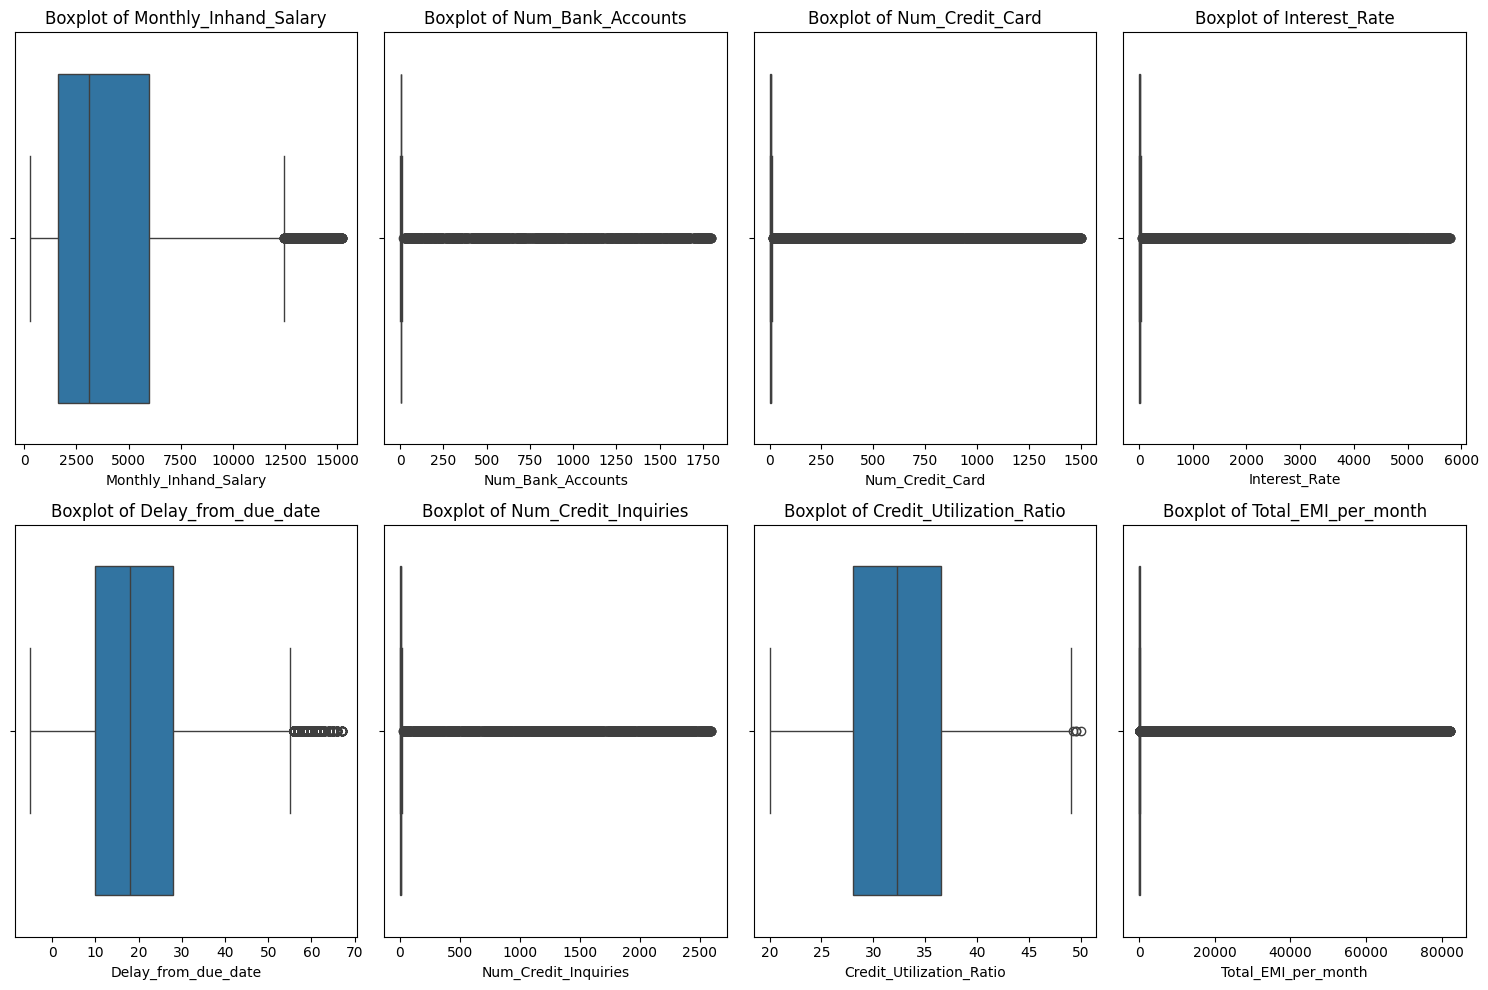

In [8]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of columns for the grid layout
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and create a boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(len(numerical_features), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
columns_to_drop = ['ID', 'Customer_ID', 'SSN', 'Type_of_Loan',
                   'Credit_History_Age','Age','Month',
                   'Occupation', 'Name',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_Behaviour']

subset_data = data[columns_to_drop]

# Display the subset dataframe
subset_data.head(15)

,ID,Customer_ID,SSN,Type_of_Loan,Credit_History_Age,Age,Month,Occupation,Name,Changed_Credit_Limit,Num_Credit_Inquiries,Payment_Behaviour
0,0x1602,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 1 Months,23,January,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Small_value_payments
1,0x1603,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,February,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Large_value_payments
2,0x1604,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 3 Months,-500,March,Scientist,Aaron Maashoh,_,4.0,Low_spent_Medium_value_payments
3,0x1605,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 4 Months,23,April,Scientist,Aaron Maashoh,6.27,4.0,Low_spent_Small_value_payments
4,0x1606,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 5 Months,23,May,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Medium_value_payments
5,0x1607,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 6 Months,23,June,Scientist,Aaron Maashoh,9.27,4.0,!@9#%8
6,0x1608,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 7 Months,23,July,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Small_value_payments
7,0x1609,CUS_0xd40,#F%$D@*&8,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,August,Scientist,NaN,11.27,4.0,High_spent_Medium_value_payments
8,0x160e,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 7 Months,28_,January,_______,Rick Rothackerj,5.42,2.0,Low_spent_Small_value_payments
9,0x160f,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 8 Months,28,February,Teacher,Rick Rothackerj,7.42,2.0,High_spent_Large_value_payments


'Monthly_Balance' - aggregate!, can still use these 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
                   'Total_EMI_per_month', 'Amount_invested_monthly'

In [10]:
data_cleaned = data.drop(columns=columns_to_drop)

In [11]:
data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3,7,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
1,19114.12,NaN,3,4,3,4,-1,NaN,Good,809.98,31.944960,No,49.574949,118.28022162236736,284.62916249607184,Good
2,19114.12,NaN,3,4,3,4,3,7,Good,809.98,28.609352,No,49.574949,81.699521264648,331.2098628537912,Good
3,19114.12,NaN,3,4,3,4,5,4,Good,809.98,31.377862,No,49.574949,199.4580743910713,223.45130972736786,Good
4,19114.12,1824.843333,3,4,3,4,6,NaN,Good,809.98,24.797347,No,49.574949,41.420153086217326,341.48923103222177,Good
5,19114.12,NaN,3,4,3,4,8,4,Good,809.98,27.262259,No,49.574949,62.430172331195294,340.4792117872438,Good
6,19114.12,1824.843333,3,4,3,4,3,8_,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good
7,19114.12,1824.843333,3,4,3,4,3,6,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard
8,34847.84,3037.986667,2,4,6,1,3,4,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard
9,34847.84,3037.986667,2,4,6,1,7,1,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good


In [12]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                   'Num_Credit_Card', 'Interest_Rate',	'Num_of_Loan',
                   'Delay_from_due_date',	'Num_of_Delayed_Payment',
                   'Outstanding_Debt',	'Credit_Utilization_Ratio',
                   'Total_EMI_per_month',	'Amount_invested_monthly','Monthly_Balance']

# Define a regular expression pattern to match special characters
pattern = r'[^\d.]'

# Remove special characters from numeric columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].replace(pattern, '', regex=True)

# Convert columns back to numeric
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].astype(float)

data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,_,809.98,26.822620,No,49.574949,80.415295,312.494089,Good
1,19114.12,NaN,3.0,4.0,3.0,4.0,-1.0,NaN,Good,809.98,31.944960,No,49.574949,118.280222,284.629162,Good
2,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,28.609352,No,49.574949,81.699521,331.209863,Good
3,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,4.0,Good,809.98,31.377862,No,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,NaN,Good,809.98,24.797347,No,49.574949,41.420153,341.489231,Good
5,19114.12,NaN,3.0,4.0,3.0,4.0,8.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,Good,809.98,23.933795,No,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,Good,605.03,24.464031,No,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good


In [13]:

print(data_cleaned.dtypes)

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [14]:
data_cleaned.sample(10
                  )

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
50860,16259.845,1398.987083,3.0,7.0,6.0,4.0,4.0,12.0,Good,1118.03,30.462473,NM,36.084269,100.115818,283.698621,Good
74618,90661.350,7346.112500,8.0,3.0,11.0,2.0,29.0,9.0,Standard,1375.13,40.677054,Yes,113.126298,103.934014,757.550938,Standard
72822,63661.600,5598.133333,3.0,5.0,16.0,2.0,20.0,11.0,_,1167.20,33.866564,NM,69.435530,117.639533,622.738270,Standard
92519,66190.340,NaN,4.0,4.0,418.0,0.0,23.0,17.0,Good,557.57,23.376700,NM,0.000000,668.338444,169.547723,Standard
89860,30693.420,2474.785000,6.0,9.0,30.0,8.0,38.0,20.0,Bad,3844.13,28.276841,NM,136.234415,203.110284,188.133801,Poor
72192,124847.490,10225.957500,4.0,5.0,1.0,0.0,12.0,10.0,_,75.19,31.948855,No,0.000000,601.795296,710.800454,Good
93209,19287.935,1399.327917,2.0,7.0,7.0,2.0,4.0,9.0,Good,102.81,29.450771,No,29.179343,63.004467,327.748982,Standard
7919,17602.930,1176.910833,9.0,10.0,29.0,6.0,47.0,17.0,Standard,2158.18,26.051164,Yes,46.777519,130.923542,229.990023,Poor
61689,95596.350,8205.362500,0.0,3.0,2.0,3.0,12.0,6.0,Good,1028.10,30.104634,No,200.559365,338.041167,531.935718,Good
43966,35304.410,3132.034167,1016.0,6.0,16.0,7.0,13.0,16.0,Standard,290.39,26.385500,Yes,201.325667,108.166554,253.711195,Standard


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [16]:
# Identify missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values:\n", missing_values)

numerical_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                     'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through numerical columns
for column in numerical_columns:
    if data_cleaned[column].isnull().any():
        # Impute missing values with mean
        imputer_mean = SimpleImputer(strategy='mean')
        data_cleaned[column] = imputer_mean.fit_transform(data_cleaned[[column]])

# Impute missing values in Credit_Mix with mode
#imputer_mode = SimpleImputer(strategy='most_frequent')
#data_cleaned['Credit_Mix'] = imputer_mode.fit_transform(data_cleaned[['Credit_Mix']])

# Verify if there are any remaining missing values
missing_values_after_imputation = data_cleaned.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values:
 Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
Missing values after imputation:
 Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Am

In [17]:
#one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['Credit_Mix', 'Payment_of_Min_Amount'], drop_first=True)


Feature Importances:
Outstanding_Debt: 0.14751805169931764
Interest_Rate: 0.1002321202432769
Delay_from_due_date: 0.08015668216341502
Monthly_Balance: 0.07010410764447035
Credit_Utilization_Ratio: 0.06927616228629689
Amount_invested_monthly: 0.06832724298981921
Annual_Income: 0.06323489797752292
Total_EMI_per_month: 0.06194300229155575
Monthly_Inhand_Salary: 0.057122772823518554
Num_of_Delayed_Payment: 0.05120777502486645
Num_Credit_Card: 0.05108636240244789
Num_Bank_Accounts: 0.03959223851398198
Num_of_Loan: 0.03248449879504302
Credit_Mix_Good: 0.03233435544890943
Credit_Mix_Standard: 0.029864483299360277
Payment_of_Min_Amount_Yes: 0.01839948321502443
Payment_of_Min_Amount_No: 0.017878370394435544
Credit_Mix__: 0.009237392786737849


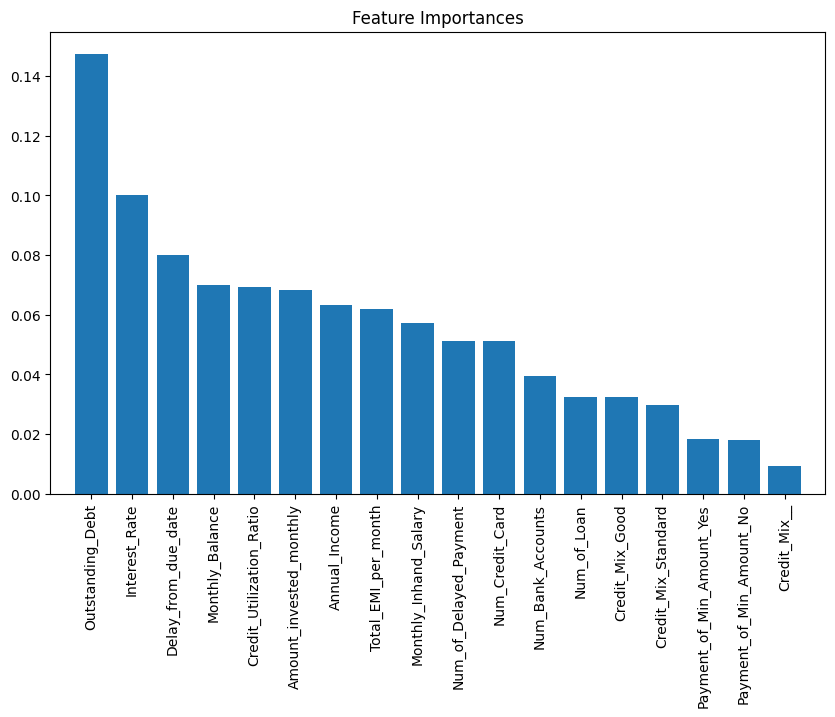

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
X = data_encoded.drop(columns=['Credit_Score'])
y = data_encoded['Credit_Score']

# Train a Random Forest Classifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



In [19]:
# Dropping columns with lower importance scores
columns_to_drop = ['Credit_Mix_Good', 'Num_of_Loan', 'Credit_Mix_Standard',
                   'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Credit_Mix__']
data_cleaned_dropped = data_encoded.drop(columns=columns_to_drop)



In [31]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for each numerical feature with respect to the target column (Credit_Score)
for column in data_cleaned_dropped.columns:
    if column != 'Credit_Score' and data_cleaned_dropped[column].dtype != 'object':
        statistic, p_value = kruskal(*[group[column].values for name, group in data_cleaned_dropped.groupby('Credit_Score')])
        print(f"Kruskal-Wallis test for {column}:")
        print(f"Statistic: {statistic}, p-value: {p_value}")
        if p_value < 0.05:  # Check if p-value is significant (typically < 0.05)
            print("There is a significant difference in the distributions across different credit score categories.")
        else:
            print("There is no significant difference in the distributions across different credit score categories.")
        print()

Kruskal-Wallis test for Annual_Income:
Statistic: 4182.73903329692, p-value: 0.0
There is a significant difference in the distributions across different credit score categories.

Kruskal-Wallis test for Monthly_Inhand_Salary:
Statistic: 3041.2806930273514, p-value: 0.0
There is a significant difference in the distributions across different credit score categories.

Kruskal-Wallis test for Num_Bank_Accounts:
Statistic: 14978.841709741326, p-value: 0.0
There is a significant difference in the distributions across different credit score categories.

Kruskal-Wallis test for Num_Credit_Card:
Statistic: 13549.757983392172, p-value: 0.0
There is a significant difference in the distributions across different credit score categories.

Kruskal-Wallis test for Interest_Rate:
Statistic: 21376.45513457169, p-value: 0.0
There is a significant difference in the distributions across different credit score categories.

Kruskal-Wallis test for Delay_from_due_date:
Statistic: 19455.079783159978, p-value:

In [20]:
data_cleaned_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  float64
 6   Num_of_Delayed_Payment    100000 non-null  float64
 7   Outstanding_Debt          100000 non-null  float64
 8   Credit_Utilization_Ratio  100000 non-null  float64
 9   Total_EMI_per_month       100000 non-null  float64
 10  Amount_invested_monthly   100000 non-null  float64
 11  Monthly_Balance           100000 non-null  float64
 12  Credit_Score              100000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 9.9+ 

In [21]:
data_cleaned_dropped.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,3.0,7.000000,809.98,26.822620,49.574949,80.415295,312.494089,Good
1,19114.12,4194.170850,3.0,4.0,3.0,-1.0,30.946268,809.98,31.944960,49.574949,118.280222,284.629162,Good
2,19114.12,4194.170850,3.0,4.0,3.0,3.0,7.000000,809.98,28.609352,49.574949,81.699521,331.209863,Good
3,19114.12,4194.170850,3.0,4.0,3.0,5.0,4.000000,809.98,31.377862,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,6.0,30.946268,809.98,24.797347,49.574949,41.420153,341.489231,Good
5,19114.12,4194.170850,3.0,4.0,3.0,8.0,4.000000,809.98,27.262259,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,3.0,8.000000,809.98,22.537593,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,3.0,6.000000,809.98,23.933795,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,3.0,4.000000,605.03,24.464031,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,7.0,1.000000,605.03,38.550848,18.816215,40.391238,484.591214,Good


In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into features (X) and target variable (y)
X = data_cleaned_dropped.drop(columns=['Credit_Score'])
y = data_cleaned_dropped['Credit_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature Importance
# Train a Random Forest Classifier to analyze feature importances
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values()
print("Feature Importances (Random Forest):")
print(feature_importances)


Feature Importances (Random Forest):
Num_Bank_Accounts           0.056547
Monthly_Inhand_Salary       0.065262
Num_of_Delayed_Payment      0.066552
Num_Credit_Card             0.067185
Total_EMI_per_month         0.072548
Annual_Income               0.073408
Amount_invested_monthly     0.075422
Credit_Utilization_Ratio    0.076893
Monthly_Balance             0.078559
Delay_from_due_date         0.093304
Interest_Rate               0.112738
Outstanding_Debt            0.161582
dtype: float64


In [33]:
'''
so useful features would be:
Outstanding_Debt
Interest_Rate
Delay_from_due_date
Monthly_Balance
Credit_Utilization_Ratio
Amount_invested_monthly
Annual_Income
'''

Common Features:
{'Monthly_Inhand_Salary', 'Monthly_Balance', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Annual_Income', 'Delay_from_due_date', 'Interest_Rate', 'Amount_invested_monthly', 'Total_EMI_per_month', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Num_Credit_Card'}


Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


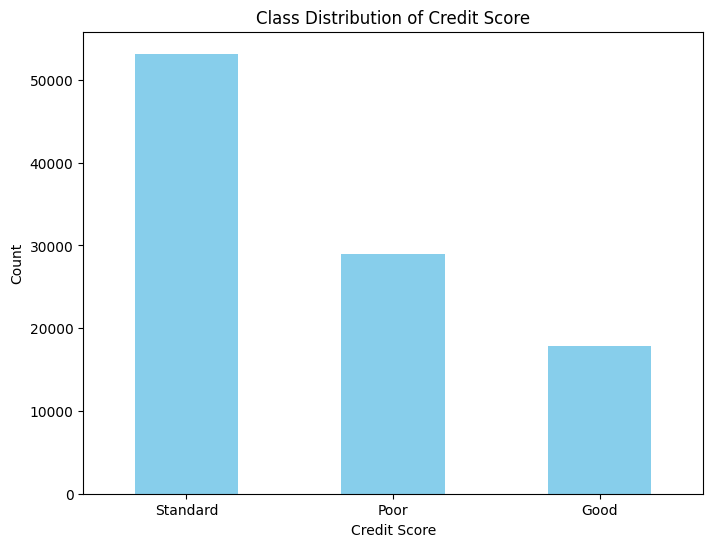

In [35]:
#checking fo class imbalance
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = data_cleaned_dropped['Credit_Score'].value_counts()
print(class_counts)

# Plot a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()


In [41]:
selected_features = ['Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date',
                     'Monthly_Balance', 'Credit_Utilization_Ratio',
                     'Amount_invested_monthly', 'Annual_Income']
X_selected = data_cleaned_dropped[selected_features]

# Split the data into features (X) and target variable (y)
X = X_selected
y = data_cleaned_dropped['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable (y_train)
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable (y_test)
y_test_encoded = label_encoder.transform(y_test)



In [54]:
#handling class imbalance using SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)



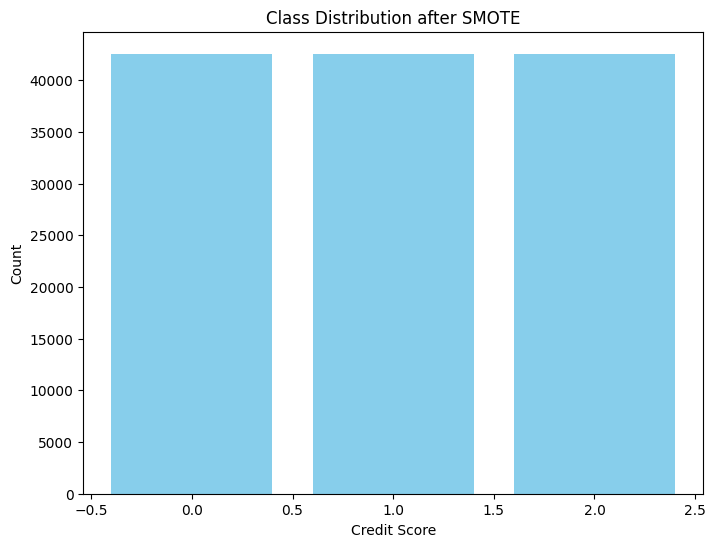

In [59]:

# Convert y_train_resampled_labels to a pandas Series
y_train_resampled_series = pd.Series(y_train_resampled)

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 6))
plt.bar(y_train_resampled_series.value_counts().index, y_train_resampled_series.value_counts().values, color='skyblue')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE')
plt.show()


After handling class imbalance, we will now train and test the data with different models.

In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the Logistic Regression classifier
logistic_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the Logistic Regression classifier
y_pred_logistic = logistic_classifier.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test_encoded, y_pred_logistic))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.18      1.00      0.30      3527
           1       0.00      0.00      0.00      5874
           2       0.00      0.00      0.00     10599

    accuracy                           0.18     20000
   macro avg       0.06      0.33      0.10     20000
weighted avg       0.03      0.18      0.05     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest Classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test_encoded, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3527
           1       0.77      0.83      0.80      5874
           2       0.82      0.77      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.78      0.77     20000
weighted avg       0.78      0.78      0.78     20000



In [66]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test_encoded, y_pred_dt))




Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      3527
           1       0.69      0.71      0.70      5874
           2       0.74      0.71      0.73     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.69      0.68     20000
weighted avg       0.70      0.70      0.70     20000



#before using the resampled values, our precision score Decision Tree Classifier:
              precision    recall  f1-score   support

        Good       0.61      0.62      0.61      3527
        Poor       0.70      0.69      0.69      5874
    Standard       0.73      0.72      0.73     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

        Good       0.61      0.48      0.54      3527
        Poor       0.70      0.65      0.67      5874
    Standard       0.69      0.77      0.73     10599

    accuracy                           0.68     20000
   macro avg       0.67      0.63      0.65     20000
weighted avg       0.68      0.68      0.68     20000



In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test_encoded, y_pred_gb))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      3527
           1       0.65      0.75      0.70      5874
           2       0.76      0.60      0.67     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.68      0.65     20000
weighted avg       0.68      0.66      0.66     20000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
y_pred_gb = grid_search.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier (Grid Search):")
print(classification_report(y_test, y_pred_gb))
